### Tutorial 7: Calculating transport and radiation properties of an O<sub>2</sub> plasma

The most common use of minplascalc is the calculation of thermophysical properties of plasmas in LTE. In this example we'll look at the transport and radiation properties viscosity $\mu$, electrical conductivity $\sigma$, thermal conductivity $\kappa$, and total volumetric emnission coefficient $\epsilon_{tot}$.

Again, we will use here the relatively simple case of a pure oxygen plasma. As in <a href="Tutorial 5 - Oxygen Plasma LTE Composition.ipynb">Tutorial 5</a>, a Mixture object must be created by the user to specify the plasma species present and the relative proportions of elements. We'll use a system identical to the previous example.

We start by loading up the matplotlib graphing module, numpy for array operations, and minplascalc.

In [1]:
%matplotlib inline
import numpy
from matplotlib import pyplot

import minplascalc as mpc

Next, we create a minplascalc LTE mixture object. Here we use a helper function in minplascalc which creates the object directly from a list of the species names.

In [2]:
oxymix = mpc.mixture.lte_from_names(
    ["O2", "O2+", "O", "O-", "O+", "O++"], [1, 0, 0, 0, 0, 0], 1000, 101325
)

Next, set a range of temperatures to calculate the thermophysical properties at - in this case we're going from 1000 to 25000 K. Also initialise lists to store the property values at each temperature

In [3]:
temperatures = numpy.linspace(1000, 25000, 100)
viscosity, econd, tcond, emissioncoefft = [], [], [], []

Now we can perform the property calculations. We loop over all the temperatures setting the mixture object's temperature attribute to the appropriate value, and calculating the relevant properties by calling the LTE object's <span style="font-family: 'Courier';">calculate_viscosity()</span>, <span style="font-family: 'Courier';">calculate_electrical_conductivity()</span>, <span style="font-family: 'Courier';">calculate_thermal_conductivity()</span>, and <span style="font-family: 'Courier';">calculate_total_emission_coefficient()</span> functions. Internally, these make calls to  <span style="font-family: 'Courier';">calculate_composition()</span> to obtain the composition of the plasma before the calculation of the properties. 

Note that execution of these calculations is fairly compute intensive and as a result the following code snippet may take several tens of seconds to complete.

In [4]:
for T in temperatures:
    oxymix.T = T
    viscosity.append(oxymix.calculate_viscosity())
    econd.append(oxymix.calculate_electrical_conductivity())
    emissioncoefft.append(oxymix.calculate_total_emission_coefficient())
    tcond.append(oxymix.calculate_thermal_conductivity())

Now we can visualise the properties by plotting them against temperature, to see how they vary.

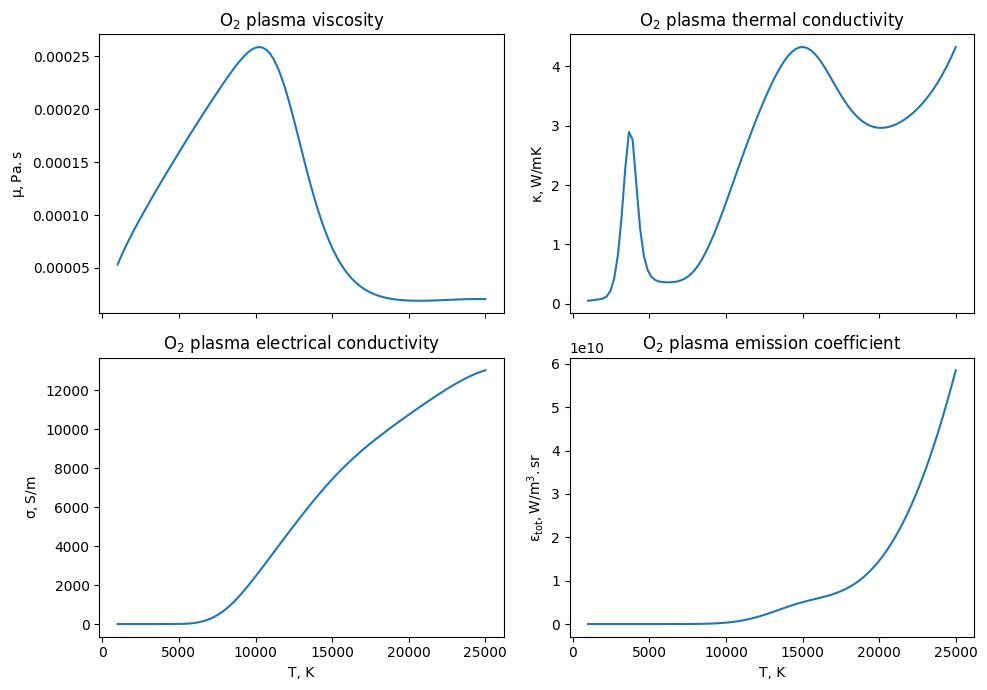

In [5]:
fig, axs = pyplot.subplots(2, 2, figsize=(10, 7), sharex=True)

ax = axs[0, 0]
ax.set_title(r"$\mathregular{O_2}$ plasma viscosity")
ax.set_ylabel("$\\mathregular{\\mu, Pa.s}$")
ax.plot(temperatures, viscosity)

ax = axs[0, 1]
ax.set_title(r"$\mathregular{O_2}$ plasma thermal conductivity")
ax.set_ylabel("$\\mathregular{\\kappa, W/mK}$")
ax.plot(temperatures, tcond)

ax = axs[1, 0]
ax.set_title(r"$\mathregular{O_2}$ plasma electrical conductivity")
ax.set_xlabel("T, K")
ax.set_ylabel("$\\mathregular{\\sigma, S/m}$")
ax.plot(temperatures, econd)

ax = axs[1, 1]
ax.set_title(r"$\mathregular{O_2}$ plasma emission coefficient")
ax.set_xlabel("T, K")
ax.set_ylabel("$\\mathregular{\\epsilon_{tot}, W/m^3.sr}$")
ax.plot(temperatures, emissioncoefft)

pyplot.tight_layout()

The results obtained using minplascalc are reasonably comparable to other data for oxygen plasmas in literature, for example Boulos et al 1994 (see README for full reference). There are some differences, particularly in the thermal conductivity curve, and these are likely to result from the use of different collision integral calculations and other base data.